# Notebook to create aggregated reference files (json) into monthly or yearly zarrs

In [1]:
import sys

In [2]:
sys.path.insert(0,'/home/jovyan/filesystem_spec')

In [3]:
from fsspec_reference_maker.combine import MultiZarrToZarr
import fsspec
import xarray as xr
import os, glob
xr.set_options(display_style='html')

In [4]:
fsspec.__file__

'/home/jovyan/filesystem_spec/fsspec/__init__.py'

gateway_cluster = False
from dask.distributed import Client, LocalCluster
from dask_gateway import Gateway

# Dask gateway
if gateway_cluster:
    gateway = Gateway()
    clusters = gateway.list_clusters()
    if not clusters:
        print('Creating new cluster. Please wait for this to finish.')
        cluster = gateway.new_cluster()
    else:
        print(f'An existing cluster was found. Connected to cluster \033[1m{clusters[0].name}\033[0m')
        cluster=gateway.connect(clusters[0].name)
    cluster.adapt(minimum=1, maximum=30)
    client = cluster.get_client()
    client.wait_for_workers(n_workers=1)

# Local cluster
else:
    cluster = LocalCluster()
    client = Client(cluster)

display(cluster)
display(client)

## Step 0: Import the library of code

In [5]:
import sys
import os
sys.path.append(os.path.join(str(os.getcwd()),'../'))
import intake_aodn
import intake

In [6]:
from intake_aodn.utils import get_local_cluster
client = get_local_cluster()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/bra467/proxy/8787/status,
Dashboard: /user/bra467/proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 28.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:8786,Workers: 4
Dashboard: /user/bra467/proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 28.00 GiB
Comm: tcp://10.0.89.204:36951,Total threads: 2
Dashboard: /user/bra467/proxy/46881/status,Memory: 7.00 GiB
Nanny: tcp://127.0.0.1:35943,


In [7]:
client.restart()

/usr/lib/python3.8/contextlib.py:120: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/bra467/proxy/8787/status,
Dashboard: /user/bra467/proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 28.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:8786,Workers: 4
Dashboard: /user/bra467/proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 28.00 GiB
Comm: tcp://10.0.89.204:41577,Total threads: 2
Dashboard: /user/bra467/proxy/37425/status,Memory: 7.00 GiB
Nanny: tcp://127.0.0.1:35943,


In [8]:
# Load credentials
def load_creds():
    with open(os.environ['HOME'] + '/.aws/credentials','rt') as f:
        f.readline()
        key=f.readline().split('=')[1].strip()
        secret=f.readline().split('=')[1].strip()
    return key, secret
key,secret=load_creds()
storage_options=dict(anon=False,key=key,secret=secret)

In [19]:
# Check a file
def open_dataset(fo,preprocess=None,storage_options=dict(anon=False,profile='default')):

    mapper=fsspec.get_mapper('reference://',
                         fo=fo,
                         #target_options=storage_options,
                         remote_protocol='s3',
                         remote_options=storage_options,
                        )
    ds = xr.open_zarr(mapper,chunks={}, consolidated=False, decode_times=False)   
    
    if preprocess is not None:
        ds = preprocess(ds)
    
    return ds

fn = '/home/jovyan/imos-data-pixeldrill-refs/CSIRO/Climatology/SSTAARS/2017/SSTAARS.json'
ds = open_dataset(fn,storage_options=storage_options)
display(ds)

<xarray.Dataset>
Dimensions:         (LATITUDE: 4500, LONGITUDE: 6000, MONTH_OF_YEAR: 12)
Coordinates:
    DEPTH           float32 ...
  * LATITUDE        (LATITUDE) float64 -69.99 -69.97 -69.95 ... 19.97 19.99
  * LONGITUDE       (LONGITUDE) float64 70.01 70.03 70.05 ... 189.9 190.0 190.0
  * MONTH_OF_YEAR   (MONTH_OF_YEAR) float64 1.5 2.5 3.5 4.5 ... 10.5 11.5 12.5
Data variables: (12/29)
    TEMP_10th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    TEMP_20th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    TEMP_30th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    TEMP_40th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    TEMP_50th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    TEMP_60th_perc  (MONTH_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 4500, 6000), meta=np.ndarray>
    ...              ...
    ta_stde_imag    (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
    ta_stde_real    (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
    tm              (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
    tm_stde         (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
    tr              (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
    tr_stde         (LATITUDE, LONGITUDE) float64 dask.array<chunksize=(4500, 6000), meta=np.ndarray>
Attributes: (12/33)
    Conventions:                   CF-1.6,IMOS-1.4
    abstract:                      25 years of Advanced Very High-Resolution ...
    acknowledgement:               The User agrees that whenever the Product ...
    author:                        Galibert, Guillaume
    author_email:                  guillaume.galibert@utas.edu.au
    citation:                      The citation in a list of references is: "...
    ...                            ...
    source:                        One-day composites of night-only sea surfa...
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    time_coverage_end:             2005-12-16T11:15:00Z
    time_coverage_start:           2005-01-15T15:45:00Z
    time_coverage_step:            30.4375
    title:                         SST Atlas of Australian Regional Seas (SST...

In [20]:
fn = '/home/jovyan/imos-data-pixeldrill-refs/CSIRO/Climatology/SSTAARS/2017/AODN-product/SSTAARS_daily_fit.json'
ds = open_dataset(fn,storage_options=storage_options)
display(ds)

<xarray.Dataset>
Dimensions:              (DAY_OF_YEAR: 365, LATITUDE: 4500, LONGITUDE: 6000)
Coordinates:
  * DAY_OF_YEAR          (DAY_OF_YEAR) float32 1.0 2.0 3.0 ... 363.0 364.0 365.0
    DEPTH                float32 ...
  * LATITUDE             (LATITUDE) float32 -69.99 -69.97 -69.95 ... 19.97 19.99
  * LONGITUDE            (LONGITUDE) float32 70.01 70.03 70.05 ... 190.0 190.0
Data variables:
    TEMP                 (DAY_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 900, 1200), meta=np.ndarray>
    TEMP_change          (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    TEMP_change_std_err  (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    TEMP_mean            (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    TEMP_mean_std_err    (LATITUDE, LONGITUDE) float32 dask.array<chunksize=(900, 1200), meta=np.ndarray>
    TEMP_std_err         (DAY_OF_YEAR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 900, 1200), meta=np.ndarray>
Attributes: (12/33)
    Conventions:                   CF-1.6,IMOS-1.4
    abstract:                      25 years of Advanced Very High-Resolution ...
    acknowledgement:               The User agrees that whenever the Product ...
    author:                        Galibert, Guillaume
    author_email:                  guillaume.galibert@utas.edu.au
    citation:                      The citation in a list of references is: "...
    ...                            ...
    source:                        One-day composites of night-only sea surfa...
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    time_coverage_end:             2005-12-31T00:00:00Z
    time_coverage_start:           2005-01-01T00:00:00Z
    time_coverage_step:            1.0
    title:                         SST Atlas of Australian Regional Seas (SST...

In [21]:
ts=ds.sel(LATITUDE=-32,LONGITUDE=115,method='nearest').load()

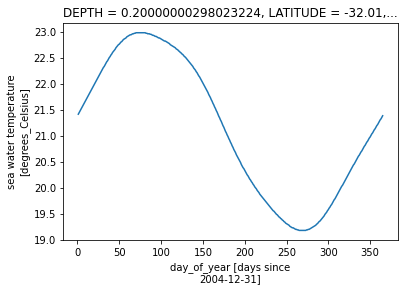

In [22]:
ts.TEMP.plot()

In [24]:
import xarray as xr
ds = xr.open_dataset('http://thredds.aodn.org.au/thredds/dodsC/IMOS/ANMN/NRS/NRSROT/aggregated_timeseries/IMOS_ANMN-NRS_VZ_20110725_NRSROT_FV01_velocity-aggregated-timeseries_END-20200214_C-20210427.nc',chunks='auto')
ds

<xarray.Dataset>
Dimensions:                (OBSERVATION: 7059147, INSTRUMENT: 25)
Coordinates:
    DEPTH                  (OBSERVATION) float32 dask.array<chunksize=(7059147,), meta=np.ndarray>
    TIME                   (OBSERVATION) datetime64[ns] dask.array<chunksize=(7059147,), meta=np.ndarray>
    LATITUDE               (INSTRUMENT) float64 dask.array<chunksize=(25,), meta=np.ndarray>
    LONGITUDE              (INSTRUMENT) float64 dask.array<chunksize=(25,), meta=np.ndarray>
    NOMINAL_DEPTH          (INSTRUMENT) float32 dask.array<chunksize=(25,), meta=np.ndarray>
Dimensions without coordinates: OBSERVATION, INSTRUMENT
Data variables:
    UCUR                   (OBSERVATION) float32 dask.array<chunksize=(7059147,), meta=np.ndarray>
    VCUR                   (OBSERVATION) float32 dask.array<chunksize=(7059147,), meta=np.ndarray>
    WCUR                   (OBSERVATION) float32 dask.array<chunksize=(7059147,), meta=np.ndarray>
    UCUR_quality_control   (OBSERVATION) float32 dask.array<chunksize=(7059147,), meta=np.ndarray>
    VCUR_quality_control   (OBSERVATION) float32 dask.array<chunksize=(7059147,), meta=np.ndarray>
    WCUR_quality_control   (OBSERVATION) float32 dask.array<chunksize=(7059147,), meta=np.ndarray>
    DEPTH_quality_control  (OBSERVATION) float32 dask.array<chunksize=(7059147,), meta=np.ndarray>
    instrument_index       (OBSERVATION) int16 dask.array<chunksize=(7059147,), meta=np.ndarray>
    source_file            (INSTRUMENT) |S64 dask.array<chunksize=(25,), meta=np.ndarray>
    instrument_id          (INSTRUMENT) |S64 dask.array<chunksize=(25,), meta=np.ndarray>
    SECONDS_TO_MIDDLE      (INSTRUMENT) float32 dask.array<chunksize=(25,), meta=np.ndarray>
    CELL_INDEX             (OBSERVATION) int16 dask.array<chunksize=(7059147,), meta=np.ndarray>
Attributes: (12/41)
    site_code:                     NRSROT
    naming_authority:              IMOS
    time_coverage_end:             2020-02-14T03:00:00Z
    license:                       http://creativecommons.org/licenses/by/4.0/
    acknowledgement:               Any users of IMOS data are required to cle...
    author:                        Klein, Eduardo
    ...                            ...
    date_created:                  2021-04-27T00:30:07Z
    file_version_quality_control:  Quality controlled data have been through ...
    title:                         Long Timeseries Velocity Aggregated produc...
    geospatial_vertical_min:       -47.169582
    DODS.strlen:                   256
    DODS.dimName:                  strlen

ModuleNotFoundError: No module named 'xhistogram'

In [26]:
ds = xr.open_dataset('http://thredds.aodn.org.au/thredds/dodsC/IMOS/ANMN/NRS/NRSROT/Velocity/IMOS_ANMN-NRS_AETVZ_20120504T060000Z_NRSROT-ADCP_FV01_NRSROT-ADCP-1205-Workhorse-ADCP-46_END-20120824T024800Z_C-20140822T071343Z.nc',chunks='auto')
ds

<xarray.Dataset>
Dimensions:                              (TIME: 32234, HEIGHT_ABOVE_SENSOR: 23, LATITUDE: 1, LONGITUDE: 1)
Coordinates:
  * TIME                                 (TIME) datetime64[ns] 2012-05-04T08:...
  * HEIGHT_ABOVE_SENSOR                  (HEIGHT_ABOVE_SENSOR) float32 3.11 ....
  * LATITUDE                             (LATITUDE) float64 -32.0
  * LONGITUDE                            (LONGITUDE) float64 115.4
Data variables: (12/52)
    TIME_quality_control                 (TIME) float32 dask.array<chunksize=(32234,), meta=np.ndarray>
    HEIGHT_ABOVE_SENSOR_quality_control  (HEIGHT_ABOVE_SENSOR) float32 dask.array<chunksize=(23,), meta=np.ndarray>
    LATITUDE_quality_control             (LATITUDE) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    LONGITUDE_quality_control            (LONGITUDE) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    VCUR                                 (TIME, HEIGHT_ABOVE_SENSOR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(32234, 23, 1, 1), meta=np.ndarray>
    VCUR_quality_control                 (TIME, HEIGHT_ABOVE_SENSOR, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(32234, 23, 1, 1), meta=np.ndarray>
    ...                                   ...
    ROLL                                 (TIME, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(32234, 1, 1), meta=np.ndarray>
    ROLL_quality_control                 (TIME, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(32234, 1, 1), meta=np.ndarray>
    HEADING                              (TIME, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(32234, 1, 1), meta=np.ndarray>
    HEADING_quality_control              (TIME, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(32234, 1, 1), meta=np.ndarray>
    DEPTH                                (TIME, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(32234, 1, 1), meta=np.ndarray>
    DEPTH_quality_control                (TIME, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(32234, 1, 1), meta=np.ndarray>
Attributes: (12/55)
    toolbox_input_file:            C:\imos\ROTTNEST\ADCP\ROT_ADCP_Aug2012\MAY...
    toolbox_version:               2.3b - PCWIN
    file_version:                  Level 1 - Quality Controlled Data
    file_version_quality_control:  Quality controlled data have passed qualit...
    project:                       Integrated Marine Observing System (IMOS)
    Conventions:                   CF-1.6,IMOS-1.3
    ...                            ...
    principal_investigator_email:  ian.darby@csiro.au
    institution_references:        http://www.imos.org.au/emii.html
    citation:                      The citation in a list of references is: "...
    acknowledgement:               Any users of IMOS data are required to cle...
    distribution_statement:        Data may be re-used, provided that related...
    project_acknowledgement:       The collection of this data was funded by ...

In [49]:
ds = ds.load()

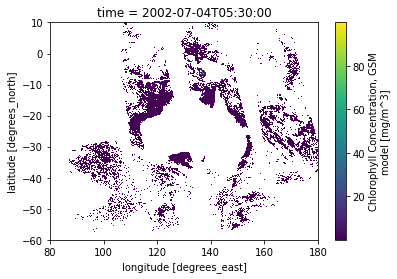

In [51]:
ds.chl_gsm.isel(time=0).plot()

In [10]:
list(ds.data_vars)

['chl_gsm']

### Find files with different chunking in the netCDF - mostly in 2016

In [11]:
# fs = fsspec.filesystem('s3',profile='default')

In [12]:
# files = fs.glob('s3://imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/2016/201605*')
# for f in files:
#     ds = open_dataset(f)
#     print(f + str(ds['satellite_zenith_angle'].encoding['chunks']))

In [13]:
# Badly chunked file: imos-data-pixeldrill/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/2016/20161001152000-ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night.nc
# fs.delete('imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/2016/20161001152000-ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night.json')

### Aggregate json at different time scales - deals with different chunk layouts by creating separate stacks for each layout

In [40]:
def aggregate_json(root='s3://imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/',
                   year='2021',
                   month='01',
                   mask='{year}/{year}{month}',
                   dest='./refs_monthly/',
                   suffix='_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night',
                   extension='json',
                   check_chunking=None,
                   check_dsets=False,
                   preprocess=None,
                   storage_options=dict(anon=False,profile='default')
                  ):
    import os
    from fsspec.core import url_to_fs
    
    fs, _ = url_to_fs(root) # fsspec.filesystem('s3',use_listings_cache=False,**storage_options)
    mask=mask.format(year=year,month=month)
    globstr = f"{root}{mask}*{suffix}.json"
    # print(globstr)
    references = fs.glob(globstr)
    
    # print(references[0:3])

    if check_dsets:
        for f in references:
            try:
                ds = open_dataset(f,storage_options=storage_options)
            except:
                print(f'Failed {f}')
                fs.rm_file(f)
                
        globstr = f"{root}{mask}*{suffix}.json"
        references = fs.glob(globstr)
        
    # print(references[0:3])
        
    if len(references) >= 1:
        so = dict(
            protocol='s3',
            profile='default', 
            default_fill_cache=False, 
            default_cache_type='first',
        )
        
        #Deal with different chunk sizes - create a separate aggregate file for each chunking layout
        chunking = {}
        if check_chunking is not None:
            for r in references:
                ds=open_dataset(r,storage_options=storage_options)
                key = ds[check_chunking].chunks
                if key in chunking.keys():
                    chunking[key].append(r)
                else:
                    chunking[key] = [r,]
        else:
            chunking['auto'] = []
            for r in references:
                chunking['auto'].append(r)
        
        #Label each set with a, b, c, ...
        labels = [chr(i) for i in range(97,97+len(chunking.keys()))]
        agg_files=[]
        for i, (chunks, refs) in enumerate(chunking.items()):
            
            #setup output location
            agg_file = f"{dest}{year}{month}{suffix}_{labels[i]}.{extension}"
            print(agg_file)
            dirname = os.path.dirname(agg_file)
            os.makedirs(dirname,exist_ok=True)
            
            if len(refs) == 1: # Only one refence in this set... just use the source reference file
                fs.get(refs[0],agg_file)
            else: # otherwise join the references into one file
                
                mzz = MultiZarrToZarr(
                    refs,
                    # storage_options=so,
                    remote_protocol="s3",
                    remote_options=storage_options,
                    xarray_concat_args=dict(dim='time',coords='minimal',join='override',compat='override',combine_attrs='override', fill_value=''),
                    preprocess=preprocess
                )
                
                if extension == 'zarr':
                    template_count = None
                else:
                    template_count = 5

                try:
                    mzz.translate(agg_file, template_count=template_count)
                except NotImplementedError as ex:
                    agg_file = f'ERROR(CHUNK): {agg_file} {str(ex)}'
                except Exception as ex:
                    agg_file = f'ERROR(UNKOWN): {agg_file} {str(ex)}'
                    raise ex
            
            agg_files.append(agg_file)
            
        return {mask: agg_files}
    else:
        return {mask: 'ERROR(NOFILES)'}
    
from dask import delayed, compute
d_aggregate_json=delayed(aggregate_json)

### Zip up monthly refs - JSON only

In [15]:
def upload_to_s3(f,urlpath='imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/agg_monthly/'):
    import fsspec
    fs = fsspec.filesystem('s3',profile='default')
    fn = os.path.basename(f)
    fs.put_file(f,urlpath + fn)
    return "Success"

In [16]:
import zipfile
def zip_files(src, dst, arcname=None):
    zip_ = zipfile.ZipFile(dst, 'w')

    for i in range(len(src)):
            zip_.write(src[i], os.path.basename(src[i]), compress_type = zipfile.ZIP_DEFLATED)
    zip_.close()

# SST Data

In [23]:
def sst_preprocess(ds):
    variables = ['dt_analysis',
                 'l2p_flags',
                 'quality_level',
                 'satellite_zenith_angle',
                 'sea_surface_temperature',
                 'sses_bias',
                 'sses_count',
                 'sses_standard_deviation',
                 'sst_dtime']
    ds = ds[variables]
    return ds

# s3://imos-data-pixeldrill/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/2016/20161001152000-ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night.nc
aggregate_json(root='s3://imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/',
               mask='2021/202101',
               dest='./refs_monthly/',
               suffix='_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night',
               extension='json',
               check_chunking='sea_surface_temperature',
               preprocess=sst_preprocess)

./refs_monthly/2021/202101_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.json


{'2021/202101': ['./refs_monthly/2021/202101_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.json']}

# MODIS Ocean Colour

In [18]:
# fs = fsspec.filesystem('s3',use_listings_cache=False,**storage_options)
# files = fs.glob('s3://imos-data-pixeldrill-refs/IMOS/SRS/OC/gridded/aqua/P1D/2016/01/A.P1D.201601*.aust.chl_oc3.json')
# len(files)

In [57]:
# s3://imos-data-pixeldrill-refs/IMOS/SRS/OC/gridded/aqua/P1D/2002/07/A.P1D.20020704T053000Z.aust.K_490.json'
aggregate_json(root='/home/jovyan/imos-data-pixeldrill-refs/IMOS/SRS/OC/gridded/aqua/P1D/',
               year='2016',
               month='01',
               mask='{year}/{month}/A.P1D.{year}{month}',
               suffix='.aust.chl_gsm',
               check_chunking='chl_gsm',
               dest='/home/jovyan/modis_monthly/',
               extension='json')

['/home/jovyan/imos-data-pixeldrill-refs/IMOS/SRS/OC/gridded/aqua/P1D/2016/01/A.P1D.20160101T000000Z.aust.chl_gsm.json', '/home/jovyan/imos-data-pixeldrill-refs/IMOS/SRS/OC/gridded/aqua/P1D/2016/01/A.P1D.20160101T053000Z.aust.chl_gsm.json', '/home/jovyan/imos-data-pixeldrill-refs/IMOS/SRS/OC/gridded/aqua/P1D/2016/01/A.P1D.20160102T000000Z.aust.chl_gsm.json']
/home/jovyan/modis_monthly/201601.aust.chl_gsm_a.json
/home/jovyan/modis_monthly/201601.aust.chl_gsm_b.json


{'2016/01/A.P1D.201601': ['/home/jovyan/modis_monthly/201601.aust.chl_gsm_a.json',
  '/home/jovyan/modis_monthly/201601.aust.chl_gsm_b.json']}

In [41]:
futures=[]
kws=[]
for year in range(2002,2022):
    for month in range(1,13):
        for var in ['K_490','chl_oc3','chl_oc3','chl_gsm']: 
            kwargs = dict(root='/home/jovyan/imos-data-pixeldrill-refs/IMOS/SRS/OC/gridded/aqua/P1D/',
                        year=f'{year}',
                        month=f'{month:02.0f}',
                        mask='{year}/{month}/A.P1D.{year}{month}',
                        suffix=f'.aust.{var}',
                        check_chunking=var,
                        dest='/home/jovyan/modis_monthly/',
                        extension='json',
                        check_dsets=True,
                        storage_options=storage_options
                       ) 
            kws.append(kwargs)
            futures.append(d_aggregate_json(**kwargs))   

In [42]:
compute(futures[100])[0]

{'2004/02/A.P1D.200402': ['/home/jovyan/modis_monthly/200402.aust.K_490_a.json',
  '/home/jovyan/modis_monthly/200402.aust.K_490_b.json']}

In [44]:
len(futures)

720

In [ ]:
results = compute(futures)[0]

In [44]:
import glob
files = sorted(glob.glob('/home/jovyan/modis_monthly/*.json'))
print(len(files))

723


In [56]:
import os
import pandas as pd
import numpy as np
alldt = []
for f in files:
    fn = os.path.basename(f)
    parts = fn.split('.')
    ym = parts[2] + '01'
    dt = pd.to_datetime(ym,format='%Y%m%d')
    alldt.append(dt)
alldt=np.array(alldt)
dt = np.diff(alldt)

In [57]:
inds = np.where(dt > pd.to_timedelta(32,'d'))
alldt[inds]

array([], dtype=object)

In [46]:
zf = '/home/jovyan/modis_monthly/references.zip'
zip_files(files,zf)

In [47]:
upload_to_s3(zf,urlpath='imos-data-pixeldrill-refs/IMOS/SRS/OC/gridded/aqua/P1D/agg_monthly/')

'Success'

In [56]:

import os
fs=fsspec.filesystem('s3',**storage_options)
fs.get('imos-data-pixeldrill-refs/IMOS/SRS/OC/gridded/aqua/P1D/agg_monthly/references.zip','/home/jovyan/to_easi/IMOS/SRS/OC/gridded/aqua/P1D/agg_monthly/references.zip')
fs.get('imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/agg_monthly/references.zip','/home/jovyan/to_easi/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/agg_monthly/references.zip')



[None]

In [ ]:
import fsspec
from fsspec.core import url_to_fs
fs,urlpath = url_to_fs('zip://*

### Yearly aggregates

### Upload to S3 bucket

In [16]:
#monthly files
agg_files = sorted(glob.glob('~/refs_monthly/*/*.json'))
futures = client.map(upload_to_s3,agg_files,urlpath='imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/agg_monthly/')
results = client.gather(futures)

In [17]:
#yearly files
agg_files = sorted(glob.glob('./refs_yearly/*/*.json'))
futures = client.map(upload_to_s3,agg_files,urlpath='imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/agg_yearly/')
results = client.gather(futures)

In [3]:
import fsspec
fs = fsspec.filesystem('s3',profile='default')

In [4]:
fs.delete('imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/agg_yearly/*night.json')

## Try using zarr instead of json

### Monthly aggregates

In [17]:
futures=[]
for year in range(1992,2022):
    for month in range(1,13):
        futures.append(d_aggregate_json(dest='./refs_monthly/',
                                        mask=f'{year}/{year}{month:02d}',
                                        extension='zarr'))   
results = compute(futures)[0]

In [9]:
def upload_zarr_to_s3(f,urlpath='imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/agg_monthly/'):
    import fsspec
    fs = fsspec.filesystem('s3',profile='default')
    fn = os.path.basename(f)
    fs.put(f+'/*',urlpath + fn + '/',recursive=True)
    return "Success"

In [ ]:
agg_files = sorted(glob.glob('./refs_monthly/*/*.zarr'))
futures = client.map(upload_zarr_to_s3,agg_files,urlpath='imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/agg_monthly/')
results = client.gather(futures)

### Yearly aggregates

In [24]:
futures=[]
for year in range(1992,2022):
        futures.append(d_aggregate_json(dest='./refs_yearly/',
                                        mask=f'{year}/{year}',
                                        extension='zarr'))   
results = compute(futures)[0]

In [10]:
agg_files = sorted(glob.glob('./refs_yearly/*/*.zarr'))
futures = client.map(upload_zarr_to_s3,agg_files,urlpath='imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/agg_yearly/')
results = client.gather(futures)

In [24]:
open_dataset('s3://imos-data-pixeldrill-refs/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/agg_yearly/1992_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr')

<xarray.Dataset>
Dimensions:                  (lat: 4500, lon: 6000, time: 262)
Coordinates:
  * lat                      (lat) float32 19.99 19.97 19.95 ... -69.97 -69.99
  * lon                      (lon) float32 70.01 70.03 70.05 ... 190.0 190.0
  * time                     (time) datetime64[us] 1992-03-21T15:20:00 ... 19...
Data variables:
    dt_analysis              (time, lat, lon) float32 dask.array<chunksize=(1, 2250, 3000), meta=np.ndarray>
    l2p_flags                (time, lat, lon) float32 dask.array<chunksize=(1, 1500, 2000), meta=np.ndarray>
    quality_level            (time, lat, lon) float32 dask.array<chunksize=(1, 2250, 3000), meta=np.ndarray>
    satellite_zenith_angle   (time, lat, lon) float32 dask.array<chunksize=(1, 2250, 3000), meta=np.ndarray>
    sea_surface_temperature  (time, lat, lon) float32 dask.array<chunksize=(1, 1500, 2000), meta=np.ndarray>
    sses_bias                (time, lat, lon) float32 dask.array<chunksize=(1, 2250, 3000), meta=np.ndarray>
    sses_count               (time, lat, lon) float32 dask.array<chunksize=(1, 2250, 3000), meta=np.ndarray>
    sses_standard_deviation  (time, lat, lon) float32 dask.array<chunksize=(1, 2250, 3000), meta=np.ndarray>
    sst_dtime                (time, lat, lon) float64 dask.array<chunksize=(1, 1500, 2000), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                      CF-1.6
    Metadata_Conventions:             Unidata Dataset Discovery v1.0
    Metadata_Link:                    TBA
    acknowledgment:                   Any use of these data requires the foll...
    cdm_data_type:                    grid
    comment:                          HRPT AVHRR experimental L3 retrieval pr...
    ...                               ...
    summary:                          Skin SST retrievals produced from stitc...
    time_coverage_end:                19920321T141620Z
    time_coverage_start:              19920321T055557Z
    title:                            IMOS L3S Nighttime gridded multiple-sen...
    uuid:                             1f323c53-8d93-4bb4-a633-49622aa4e497
    westernmost_longitude:            70.01000213623047

### Full series aggregate

In [14]:
references = sorted(glob.glob('./refs_yearly/*/*.zarr'))
extension = 'zarr'

def _preprocess(ds):
    variables = ['dt_analysis',
                 'l2p_flags',
                 'quality_level',
                 'satellite_zenith_angle',
                 'sea_surface_temperature',
                 'sses_bias',
                 'sses_count',
                 'sses_standard_deviation',
                 'sst_dtime']
    ds = ds[variables]
    return ds

so = dict(
    protocol='s3',
    profile='default', 
    default_fill_cache=False, 
    default_cache_type='first',
)

#Deal with different chunk sizes - create a separate aggregate file for each chunking layout
chunking = {}
for r in references:
    print(r)
    ds=open_dataset(r)
    key = ds['sea_surface_temperature'].chunks
    if key in chunking.keys():
        chunking[key].append(r)
    else:
        chunking[key] = [r,]

#Label each set with a, b, c, ...
labels = [chr(i) for i in range(97,97+len(chunking.keys()))]
agg_files=[]
for i, (chunks, refs) in enumerate(chunking.items()):
    print(len(refs))
    mzz = MultiZarrToZarr(
        refs,
        storage_options=so,
        remote_protocol="s3",
        remote_options={'profile': 'default'},
        xarray_concat_args=dict(dim='time',coords='minimal',join='override',compat='override',combine_attrs='override', fill_value=''),
        preprocess=_preprocess
    )

    agg_file = f"ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night.{extension}".replace(f'.{extension}',f'_{labels[i]}.{extension}')
    mzz.translate(agg_file, template_count=None)
    print(agg_file)

./refs_yearly/1992/1992_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/1993/1993_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/1994/1994_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/1995/1995_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/1996/1996_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/1997/1997_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/1998/1998_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/1999/1999_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/2000/2000_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/2001/2001_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/2002/2002_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/2003/2003_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/2004/2004_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.zarr
./refs_yearly/2005/2005_ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night

OSError: [Errno 22] The specified bucket is not valid.

In [18]:
refs = sorted(glob.glob('./refs_yearly/*/*_a.json'))
extension = 'zarr'

def _preprocess(ds):
    variables = ['dt_analysis',
                 'l2p_flags',
                 'quality_level',
                 'satellite_zenith_angle',
                 'sea_surface_temperature',
                 'sses_bias',
                 'sses_count',
                 'sses_standard_deviation',
                 'sst_dtime']
    ds = ds[variables]
    return ds

so = dict(
#     protocol='s3',
#     profile='default', 
    default_fill_cache=False, 
    default_cache_type='first',
)

mzz = MultiZarrToZarr(
    refs,
    storage_options=so,
    remote_protocol="s3",
    remote_options={'profile': 'default'},
    xarray_concat_args=dict(dim='time',coords='minimal',join='override',compat='override',combine_attrs='override', fill_value=''),
    preprocess=_preprocess
)

agg_file = f"ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night.{extension}".replace(f'.{extension}',f'_{labels[i]}.{extension}')
mzz.translate(agg_file, template_count=None)
print(agg_file)

IndexError: list index out of range

In [15]:
chunking

{((1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1